<a href="https://www.kaggle.com/code/yongwonjin/digit-recognizer?scriptVersionId=90586035" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit recognizer
Kudos to the following notebooks by:  
[Poonam Ligade](https://www.kaggle.com/poonaml/deep-neural-network-keras-way)  
[Yassine Ghouzam](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

In [1]:
# Data wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data modeling
import tensorflow as tf
from sklearn.model_selection import train_test_split
print('Tensorflow version: ', tf.__version__)

## <b> 1 <span style='color:#ffb2ae'> | </span>  Data prep & EDA </b> 
<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffb2ae;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>1.1 &nbsp; Load data </b>
    </p>
</div> 

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
# Load train and test data
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffb2ae;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>1.2 &nbsp; EDA </b>
    </p>
</div> 

In [4]:
df_train.head()
# df_test.head()
# 784.0**0.5

### Each row is a grayscale image of size 28x28 pixels
### For each image, we have one label (1st column) and 784 pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df_train.info()
df_train.describe(include='all')
# df_train.min().min()
# df_train.max().max()

### Label column has values from 0-9. 
### Pixel values are from 0-255

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='label', ylabel='count'>

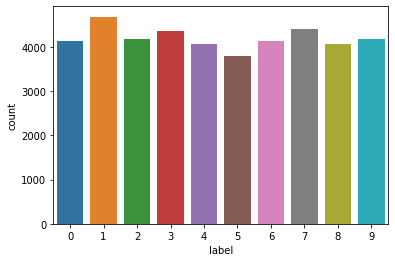

In [6]:
sns.countplot(x=df_train.label)

### Labels seem to be pretty balanced

In [7]:
# Always check for any duplicates
df_train.duplicated().value_counts()

### No duplicates here

False    42000
dtype: int64

In [8]:
# Always check for missing values in each column
df_train.isnull().sum().describe()
# df_test.isnull().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [9]:
sample_submission.head()

### Task is to predict "Label" from {0-9} for each "ImageId"

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


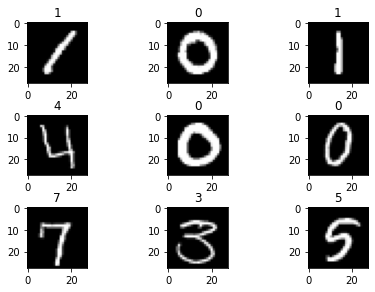

In [10]:
# Visualize a few images from the train data set
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()

for i, ax in enumerate(axes.ravel()):
    ax.imshow(df_train.iloc[i,1:].values.reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(df_train.iloc[i,0])
plt.show()

#### **EDA KEY INSIGHTS**
1. Each row in the data set represents a grayscale image of a handwritten digit
2. Each image is 28x28 pixels in dimensions and each pixel has an intensity value from 0 (black) to 255 (white). 
3. No missing or duplicate data. 
4. No class imbalance in training data set.

## <b> 2 <span style='color:#ffc967'> | </span> Data processing</b>
<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffc967;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>2.1 &nbsp; Reshape data</b>
    </p>
</div> 

In [11]:
# Separate only pixel data from df_train
X = df_train.iloc[:,1:]

In [12]:
# Change format to Numpy array and reshape each row to image dimensions (28 x 28 x 1)
# * Keras requires 3 dimensions (width, height, and color channels)
X = X.values.reshape(-1, 28, 28, 1)
X_test = df_test.values.reshape(-1, 28, 28, 1)

<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffc967;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>3.2 &nbsp; Label encoding</b>
    </p>
</div> 

In [15]:
# Label encoding
Y = df_train.label # extract label from train data
Y = pd.get_dummies(Y) # one-hot encoding

<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffc967;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>3.3 &nbsp; Train-test split</b>
    </p>
</div> 

In [16]:
# Split data with labels into training and validation sets. 
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=7)

<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #ffc967;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>3.4 &nbsp; Data input pipeline</b>
    </p>
</div> 
Using the ImageDataGenerator class in Tensorflow-Keras, we can easily apply various transformations and data augmentations to the input images!<br>
It also allows us to split the input data into training and test set (<i>note that this is not random sample - Keras just slices the last x samples from the dataset</i>)

In [23]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    validation_split=0.33
)

In [24]:
data_gen.flow(X, Y, batch_size=5)

In [13]:
# Scale pixel values from 0 to 1 by dividing by 255.0
X = X/255.0
X_test = X_test/255.0

# Alternatively, we can standardize to zero mean and unit variance
# def standardize(x):
#     mean_x = x.mean()
#     std_x = x.std()
#     return (x-mean_x)/std_x


## <b> 3 <span style='color:#90ee90'> | </span> Modeling</b>

In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()

<div style='color: white; display: fill; 
    border-radius: 8px; background-color: #90ee90;
    font-size: 100%; letter-spacing:0.5px'> 
    <p style='padding: 8px; color: black;'> 
        <b>3.1 &nbsp; Multi-layer perceptron (MLP) </b>
    </p>
</div> 

In [ ]:
MLP = tf.keras.models.Sequential([
    tf.keras.layers.InputLyaer((28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((28,28,1)),
    tf.keras.layers.Conv2D(3, 3),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2022-03-19 15:59:17.578358: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()

In [19]:
model.compile(optimizer='adam',
              loss=loss_fn, 
              metrics=['accuracy'])

In [20]:
model.summary()
#Y_train.shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 3)         12        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 3)         84        
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 3)         12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0

In [21]:
model.fit(X_train,Y_train, epochs=5)

2022-03-19 15:59:17.919923: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
880/880 [==============================] - 12s 12ms/step - loss: 0.2870 - accuracy: 0.9119
Epoch 2/5
880/880 [==============================] - 11s 12ms/step - loss: 0.1264 - accuracy: 0.9593
Epoch 3/5
880/880 [==============================] - 12s 13ms/step - loss: 0.0934 - accuracy: 0.9699
Epoch 4/5
880/880 [==============================] - 11s 12ms/step - loss: 0.0680 - accuracy: 0.9783
Epoch 5/5
880/880 [==============================] - 11s 13ms/step - loss: 0.0572 - accuracy: 0.9808


In [22]:
model.evaluate(X_valid, Y_valid)

434/434 [==============================] - 1s 3ms/step - loss: 0.1044 - accuracy: 0.9717


[0.10444629937410355, 0.9717171788215637]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
Y_pred = model.predict(X_valid)
Y_pred = np.argmax(Y_pred, axis=1)

In [46]:
print(classification_report(np.argmax(Y_valid.values, axis=1), Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1378
           1       0.99      0.99      0.99      1591
           2       0.98      0.96      0.97      1354
           3       0.97      0.95      0.96      1433
           4       0.97      0.97      0.97      1369
           5       0.94      0.97      0.95      1212
           6       0.98      0.98      0.98      1338
           7       0.97      0.99      0.98      1447
           8       0.97      0.96      0.96      1363
           9       0.97      0.96      0.96      1375

    accuracy                           0.97     13860
   macro avg       0.97      0.97      0.97     13860
weighted avg       0.97      0.97      0.97     13860



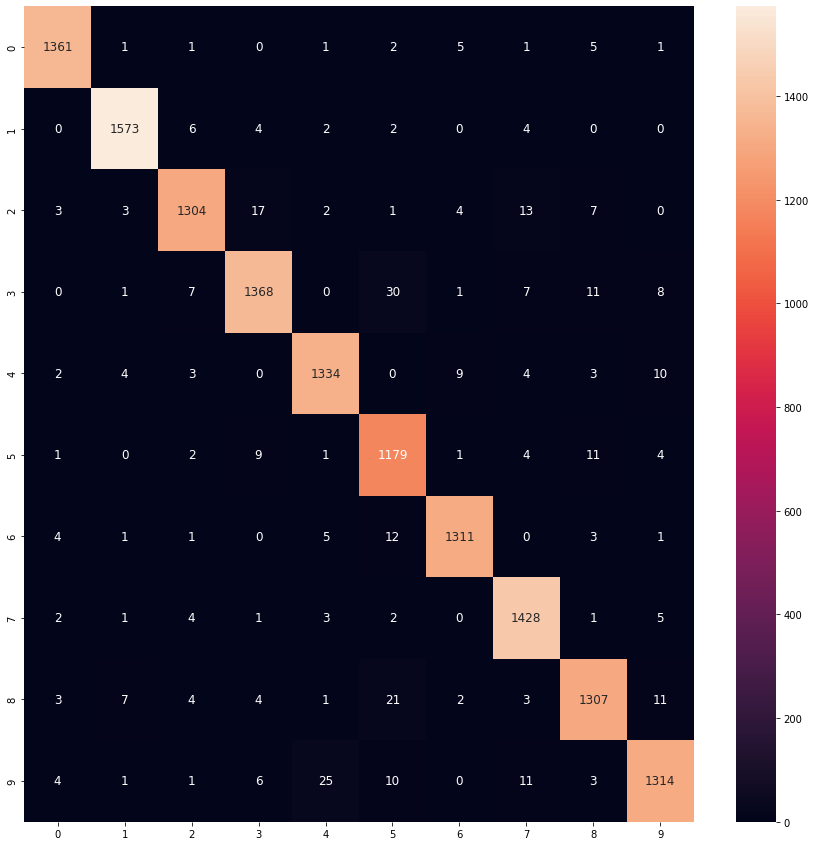

In [49]:
cm = confusion_matrix(np.argmax(Y_valid.values, axis=1), Y_pred)
cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (15,15))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size
plt.show()

In [23]:
predictions = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'ImageId': df_test.index+1,
                      'Label': predictions.argmax(axis=1)})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

# ***Work in progress!***